In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the combined dataset
dataset = pd.read_csv('C:/Users/pooja/OneDrive/Desktop/pwd_cy/combined_dataset_1_3_with_sender.csv')

# Separate features (X) and target (y)
X = dataset[['Date', 'Message', 'Message_ID', 'sender_domain', 'sender_reputation']]
y = dataset['Spam/Ham']

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize TF-IDF vectorizer for text column (Message)
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # Adjust max_features as needed

# Fit and transform the text data
X_train_message_tfidf = tfidf_vectorizer.fit_transform(X_train['Message'])
X_test_message_tfidf = tfidf_vectorizer.transform(X_test['Message'])

# Concatenate TF-IDF transformed data with other features
X_train_transformed = pd.concat([pd.DataFrame(X_train_message_tfidf.toarray()), X_train.drop('Message', axis=1)], axis=1)
X_test_transformed = pd.concat([pd.DataFrame(X_test_message_tfidf.toarray()), X_test.drop('Message', axis=1)], axis=1)

# Initialize and train a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_transformed, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test_transformed)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False,
            xticklabels=rf_classifier.classes_, yticklabels=rf_classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


ValueError: np.nan is an invalid document, expected byte or unicode string.

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the combined dataset
dataset = pd.read_csv('C:/Users/pooja/OneDrive/Desktop/pwd_cy/combined_dataset_1_3_with_sender.csv')

# Handle missing values in 'Message' column
dataset['Message'].fillna("", inplace=True)

# Try to convert 'Date' column to datetime format, with errors='coerce' to handle non-conforming dates
dataset['Date'] = pd.to_datetime(dataset['Date'], errors='coerce')

# Drop rows with NaT (not a valid datetime) in 'Date' column
dataset.dropna(subset=['Date'], inplace=True)

# Convert 'Date' to numeric representation (example: days since a reference date)
dataset['Date'] = (dataset['Date'] - dataset['Date'].min()).dt.days

# Separate features (X) and target (y)
X = dataset[['Date', 'Message', 'Message_ID', 'sender_domain', 'sender_reputation']]
y = dataset['Spam/Ham']

# Initialize TF-IDF vectorizer for text column (Message)
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # Adjust max_features as needed

# Fit and transform the text data
tfidf_features = tfidf_vectorizer.fit_transform(X['Message'])

# Convert TF-IDF transformed data to DataFrame
tfidf_features_df = pd.DataFrame(tfidf_features.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Combine TF-IDF transformed data with other features
X_transformed = pd.concat([X.drop('Message', axis=1).reset_index(drop=True), tfidf_features_df], axis=1)

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

# Initialize and train a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False,
            xticklabels=rf_classifier.classes_, yticklabels=rf_classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Feature importance analysis
feature_importances = pd.DataFrame(rf_classifier.feature_importances_,
                                   index=X_train.columns,
                                   columns=['Importance'])
feature_importances = feature_importances.sort_values('Importance', ascending=False)
print("Feature Importances:")
print(feature_importances)

# Plotting feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances.index, y=feature_importances['Importance'])
plt.xticks(rotation=45)
plt.title('Feature Importances')
plt.show()


C:\Users\pooja\AppData\Local\Temp\ipykernel_11768\2326569151.py:16: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  dataset['Date'] = pd.to_datetime(dataset['Date'], errors='coerce')


ValueError: could not convert string to float: '(Copyright 2001 by the Chicago Tribune)'

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the combined dataset
dataset = pd.read_csv('C:/Users/pooja/OneDrive/Desktop/pwd_cy/combined_dataset_1_3_with_sender.csv')

# Handle missing values in 'Message' column
dataset['Message'].fillna("", inplace=True)

# Try to convert 'Date' column to datetime format, with errors='coerce' to handle non-conforming dates
dataset['Date'] = pd.to_datetime(dataset['Date'], errors='coerce')

# Drop rows with NaT (not a valid datetime) in 'Date' column
dataset.dropna(subset=['Date'], inplace=True)

# Convert 'Date' to numeric representation (example: days since a reference date)
dataset['Date'] = (dataset['Date'] - dataset['Date'].min()).dt.days

# Separate features (X) and target (y)
X = dataset[['Date', 'Message', 'Message_ID', 'sender_domain', 'sender_reputation']]
y = dataset['Spam/Ham']

# Initialize TF-IDF vectorizer for text column (Message)
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # Adjust max_features as needed

# Fit and transform the text data
tfidf_features = tfidf_vectorizer.fit_transform(X['Message'])

# Convert TF-IDF transformed data to DataFrame
tfidf_features_df = pd.DataFrame(tfidf_features.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Combine TF-IDF transformed data with other features
X_transformed = pd.concat([X.drop('Message', axis=1).reset_index(drop=True), tfidf_features_df], axis=1)

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

# Initialize and train a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False,
            xticklabels=rf_classifier.classes_, yticklabels=rf_classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


C:\Users\pooja\AppData\Local\Temp\ipykernel_11768\1276475800.py:16: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  dataset['Date'] = pd.to_datetime(dataset['Date'], errors='coerce')


ValueError: could not convert string to float: 'Copyright 2001 by the Chicago Tribune'

C:\Users\pooja\AppData\Local\Temp\ipykernel_11768\3890350477.py:15: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  dataset['Date'] = pd.to_datetime(dataset['Date'], errors='coerce')


Accuracy: 1.00
Confusion Matrix:
[[21  0]
 [ 0 19]]


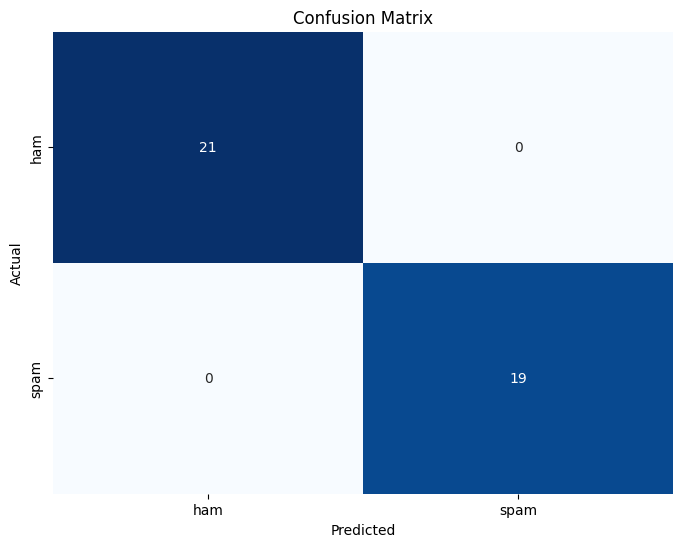

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the updated dataset
dataset = pd.read_csv('C:/Users/pooja/OneDrive/Desktop/pwd_cy/combined_dataset_1_3_with_sender.csv')

# Handle missing values in 'Message' column
dataset['Message'].fillna("", inplace=True)

# Try to convert 'Date' column to datetime format, with errors='coerce' to handle non-conforming dates
dataset['Date'] = pd.to_datetime(dataset['Date'], errors='coerce')

# Drop rows with NaT (not a valid datetime) in 'Date' column
dataset.dropna(subset=['Date'], inplace=True)

# Convert 'Date' to numeric representation (example: days since a reference date)
dataset['Date'] = (dataset['Date'] - dataset['Date'].min()).dt.days

# Separate features (X) and target (y)
X = dataset[['Date', 'Message', 'Message_ID', 'sender_domain', 'sender_reputation']]
y = dataset['Spam/Ham']

# Initialize and fit TF-IDF vectorizer for text column (Message)
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # Adjust max_features as needed
tfidf_features = tfidf_vectorizer.fit_transform(X['Message'])

# Convert TF-IDF transformed data to DataFrame
tfidf_features_df = pd.DataFrame(tfidf_features.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Combine TF-IDF transformed data with other features
X_transformed = pd.concat([X.drop('Message', axis=1).reset_index(drop=True), tfidf_features_df], axis=1)

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

# Initialize and train a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False,
            xticklabels=rf_classifier.classes_, yticklabels=rf_classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


C:\Users\pooja\AppData\Local\Temp\ipykernel_11768\2505653809.py:16: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  dataset['Date'] = pd.to_datetime(dataset['Date'], errors='coerce')


Accuracy: 1.00
Confusion Matrix:
[[21  0]
 [ 0 19]]


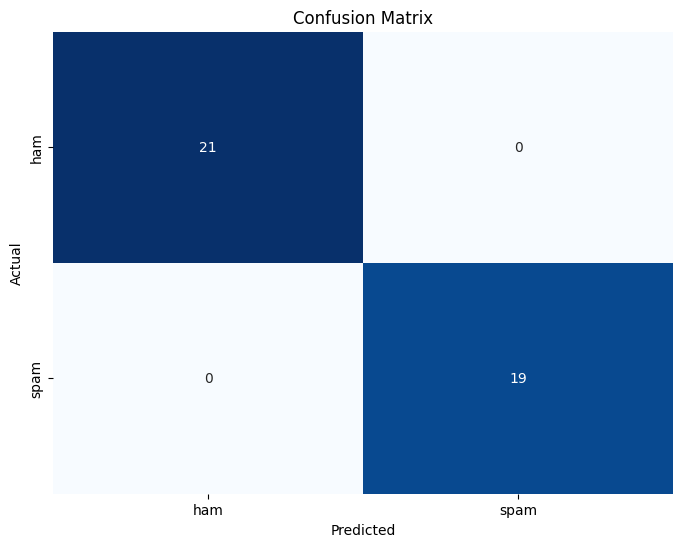

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the combined dataset
dataset = pd.read_csv('C:/Users/pooja/OneDrive/Desktop/pwd_cy/combined_dataset_1_3_with_sender.csv')

# Handle missing values in 'Message' column
dataset['Message'].fillna("", inplace=True)

# Try to convert 'Date' column to datetime format, with errors='coerce' to handle non-conforming dates
dataset['Date'] = pd.to_datetime(dataset['Date'], errors='coerce')

# Drop rows with NaT (not a valid datetime) in 'Date' column
dataset.dropna(subset=['Date'], inplace=True)

# Convert 'Date' to numeric representation (days since a reference date)
dataset['Date'] = (dataset['Date'] - dataset['Date'].min()).dt.days

# Replace 'sender_domain' with a numeric representation (for demonstration purposes)
# Replace string values with unique numeric identifiers
dataset['sender_domain'] = dataset['sender_domain'].astype('category').cat.codes

# Separate features (X) and target (y)
X = dataset[['Date', 'Message', 'Message_ID', 'sender_domain', 'sender_reputation']]
y = dataset['Spam/Ham']

# Initialize TF-IDF vectorizer for text column (Message)
tfidf_vectorizer = TfidfVectorizer(max_features=500, stop_words='english')  # Adjust max_features and other parameters as needed

# Fit and transform the text data
tfidf_features = tfidf_vectorizer.fit_transform(X['Message'])

# Convert TF-IDF transformed data to DataFrame
tfidf_features_df = pd.DataFrame(tfidf_features.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Combine TF-IDF transformed data with other features
X_transformed = pd.concat([X.drop('Message', axis=1).reset_index(drop=True), tfidf_features_df], axis=1)

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

# Initialize and train a Random Forest classifier with Grid Search for parameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
rf_classifier = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best model from Grid Search
best_rf_classifier = grid_search.best_estimator_

# Predict on the test set
y_pred = best_rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False,
            xticklabels=best_rf_classifier.classes_, yticklabels=best_rf_classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [39]:
model = joblib.load('email_detection_model.pkl')
model_type = type(model)
print(f"Model Type: {model_type}")


Model Type: <class 'numpy.ndarray'>


In [2]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from scipy.sparse import hstack

# Load data
dataset = pd.read_csv("C:/Users/pooja/OneDrive/Desktop/pwd_cy/combined_dataset_1_3_with_sender.csv")

# Check for missing values in the Message column (if necessary)
if dataset['Message'].isnull().any():
    dataset['Message'] = dataset['Message'].fillna('')  # Replace NaN with empty string
else:
    print("No missing values in Message column")

# Feature engineering: Clean Message column
def clean_message(text):
    text = re.sub(r"\([^)]+\)", "", text)  # Remove text in parentheses
    return text

dataset['Message'] = dataset['Message'].apply(clean_message)

# Extract features and target variable
X = dataset["Message"]
y = dataset["Spam/Ham"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Text vectorization
vectorizer = TfidfVectorizer()

# Transform text data
X_train_transformed = vectorizer.fit_transform(X_train)
X_test_transformed = vectorizer.transform(X_test)

# Handle "sender_domain" and "sender_reputation" features (if present)
if "sender_domain" in dataset.columns and "sender_reputation" in dataset.columns:
    X_train_additional = dataset[["sender_domain", "sender_reputation"]].iloc[X_train.index].reset_index(drop=True)
    X_test_additional = dataset[["sender_domain", "sender_reputation"]].iloc[X_test.index].reset_index(drop=True)

    # Concatenate additional features using hstack (assuming they are sparse matrices)
    X_train_features = hstack([X_train_transformed, X_train_additional])
    X_test_features = hstack([X_test_transformed, X_test_additional])
else:
    X_train_features = X_train_transformed
    X_test_features = X_test_transformed

# Print shapes of X_train_features and X_test_features
print("Shape of X_train_features:", X_train_features.shape)
print("Shape of X_test_features:", X_test_features.shape)

Shape of X_train_features: (140, 3795)
Shape of X_test_features: (60, 3795)


In [4]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from scipy.sparse import hstack
import joblib
# Instantiate and fit RandomForestClassifier
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=5)
grid_search.fit(X_train_features, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions with the best model
predictions = best_model.predict(X_test_features)

# Evaluate model performance
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions, pos_label='spam')  # Specify pos_label as 'spam' or 'ham'
recall = recall_score(y_test, predictions, pos_label='spam')        # Specify pos_label as 'spam' or 'ham'

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)




NameError: name 'accuracy_score' is not defined

In [54]:
# Instantiate and fit RandomForestClassifier
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=5)
grid_search.fit(X_train_features, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions with the best model
predictions = best_model.predict(X_test_features)

# Evaluate model performance
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions, pos_label='ham')  # Specify pos_label as 'spam' or 'ham'
recall = recall_score(y_test, predictions, pos_label='ham')        # Specify pos_label as 'spam' or 'ham'

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

joblib.dump(best_model, 'best_email_detection_model.pkl')

Accuracy: 0.9166666666666666
Precision: 1.0
Recall: 0.8529411764705882


In [52]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load data
dataset = pd.read_csv("C:/Users/pooja/OneDrive/Desktop/pwd_cy/combined_dataset_1_3_with_sender.csv")

# Handle missing values in the Message column
dataset['Message'].fillna("", inplace=True)

# Text preprocessing
def clean_message(text):
    text = re.sub(r"\([^)]+\)", "", text)  # Remove text in parentheses
    return text

dataset['Message'] = dataset['Message'].apply(clean_message)

# Feature extraction
X = dataset["Message"]
y = dataset["Spam/Ham"]

# Text vectorization (TF-IDF)
vectorizer = TfidfVectorizer(max_features=500, stop_words='english', ngram_range=(1, 2))
X_transformed = vectorizer.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.3, random_state=42)

# Initialize and train RandomForestClassifier with GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'class_weight': ['balanced', None]
}

rf_classifier = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best model from Grid Search
best_rf_classifier = grid_search.best_estimator_

# Predict on the test set
y_pred = best_rf_classifier.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='spam')  # Adjust pos_label as needed
recall = recall_score(y_test, y_pred, pos_label='spam')        # Adjust pos_label as needed
f1 = f1_score(y_test, y_pred, pos_label='spam')                # Adjust pos_label as needed

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")


Accuracy: 0.63
Precision: 0.61
Recall: 0.42
F1-score: 0.50


In [8]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from scipy.sparse import hstack
import joblib

# Load data
dataset = pd.read_csv("C:/Users/pooja/OneDrive/Desktop/pwd_cy/combined_dataset_1_3_with_sender.csv")

# Check for missing values in the Message column (if necessary)
if dataset['Message'].isnull().any():
    dataset['Message'] = dataset['Message'].fillna('')  # Replace NaN with empty string
else:
    print("No missing values in Message column")

# Feature engineering: Clean Message column
def clean_message(text):
    text = re.sub(r"\([^)]+\)", "", text)  # Remove text in parentheses
    return text

dataset['Message'] = dataset['Message'].apply(clean_message)

# Extract features and target variable
X = dataset["Message"]
y = dataset["Spam/Ham"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Text vectorization
vectorizer = TfidfVectorizer()

# Transform text data
X_train_transformed = vectorizer.fit_transform(X_train)
X_test_transformed = vectorizer.transform(X_test)

# Save the vectorizer
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')

# Handle "sender_domain" and "sender_reputation" features (if present)
if "sender_domain" in dataset.columns and "sender_reputation" in dataset.columns:
    X_train_additional = dataset[["sender_domain", "sender_reputation"]].iloc[X_train.index].reset_index(drop=True)
    X_test_additional = dataset[["sender_domain", "sender_reputation"]].iloc[X_test.index].reset_index(drop=True)

    # Concatenate additional features using hstack (assuming they are sparse matrices)
    X_train_features = hstack([X_train_transformed, X_train_additional])
    X_test_features = hstack([X_test_transformed, X_test_additional])
else:
    X_train_features = X_train_transformed
    X_test_features = X_test_transformed

# Print shapes of X_train_features and X_test_features
print("Shape of X_train_features:", X_train_features.shape)
print("Shape of X_test_features:", X_test_features.shape)

# Instantiate and fit RandomForestClassifier
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=5)
grid_search.fit(X_train_features, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions with the best model
predictions = best_model.predict(X_test_features)

# Evaluate model performance
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions, pos_label='spam')  # Specify pos_label as 'spam' or 'ham'
recall = recall_score(y_test, predictions, pos_label='spam')        # Specify pos_label as 'spam' or 'ham'

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

# Save the model
joblib.dump(best_model, 'best_email_detection_model.pkl')


Shape of X_train_features: (140, 3795)
Shape of X_test_features: (60, 3795)
Accuracy: 0.9166666666666666
Precision: 0.8387096774193549
Recall: 1.0


['best_email_detection_model.pkl']